#  IA para Redes de Suministro 

👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/An%C3%A1lisis%20predictivo%20para%20toma%20de%20decisiones%20RRHH)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/Data/RRHH)  
---


# 📘 Notebook 3 – Introducción a Redes Neuronales: Clasificación de Proveedores  

En este notebook daremos nuestros primeros pasos en el uso de redes neuronales artificiales (RNA) aplicadas a la clasificación de proveedores dentro de una cadena de suministro.  

Partiremos del dataset previamente preprocesado y listo para modelar del [Notebook 01](https://github.com/LeStark/Cursos/blob/main/02%20-%20IA4SC/Notebook%2001%20Introducci%C3%B3n%20ML%20supervisado%20y%20no%20supervisado.ipynb), con el fin de entrenar una red neuronal sencilla que permita diferenciar a los proveedores según su desempeño y características clave.  

### 📂 Estructura del Dataset  

El dataset contiene información simulada de proveedores, con variables como:  

- **Tiempos de entrega**: desempeño del proveedor en cumplir los plazos.  
- **Calidad del producto**: medición de estándares de cumplimiento.  
- **Flexibilidad**: capacidad de adaptarse a cambios en el pedido.  
- **Costo relativo**: nivel de precios frente a la competencia.  
- **Categoría de proveedor**: variable objetivo (ej. confiable, regular, crítico).  

Estas variables se usarán como insumo para la red neuronal que entrenaremos en este notebook.  

### 🎯 Objetivos del Notebook  

- Recordar el proceso de **preparación de datos** (codificación y estandarización).  
- Explicar los **conceptos básicos de redes neuronales**:  
  - Neuronas, capas y funciones de activación.  
  - Propagación hacia adelante y retropropagación.  
- Implementar un **modelo de red neuronal simple** usando `scikit-learn` o `keras`.  
- Entrenar la red neuronal para **clasificar proveedores** en distintas categorías.  
- Evaluar el desempeño del modelo con métricas de clasificación.  

### 🛠️ Herramientas a utilizar  

- **pandas** y **numpy**: manipulación de datos.  
- **scikit-learn**: utilidades para partición de datos y métricas de evaluación.  
- **tensorflow / keras**: construcción y entrenamiento de redes neuronales.  
- **matplotlib** y **seaborn**: visualización de resultados y métricas.  

Al finalizar este notebook, contarás con tu **primer modelo de red neuronal entrenado**, capaz de clasificar proveedores en diferentes categorías y con el potencial de ser mejorado en notebooks posteriores.  


In [3]:
# Librerías principales para el proyecto

# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Utilidades matemáticas
import math

# Manejo de advertencias (para ocultar mensajes innecesarios)
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder    # Codificación de variables categóricas
from sklearn.preprocessing import StandardScaler  # Estandarización de variables numéricas

# División de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Construcción y entrenamiento de modelos de redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Evaluación de modelos
from sklearn.metrics import (
    confusion_matrix,          # Matriz de confusión
    ConfusionMatrixDisplay,    # Visualización de la matriz de confusión
    classification_report,     # Métricas de precisión, recall y F1
    accuracy_score             # Exactitud global
)

# Guardado y carga de modelos entrenados
import joblib

### Transformación de datos

En esta celda realizamos el **preprocesamiento completo del dataset de proveedores**.  
Primero cargamos los datos desde un repositorio en GitHub, luego transformamos la variable categórica **"categoria_proveedor"** en valores numéricos y, finalmente, **estandarizamos las variables numéricas** para que todas estén en la misma escala.  

El resultado es un dataset limpio y listo para ser usado en modelos de **Machine Learning** orientados a la clasificación de proveedores.  


In [5]:
# 📥 Carga del Dataset de Evaluación de Proveedores
# ------------------------------------------------
# En esta celda cargamos un dataset adaptado del famoso Iris,
# pero reinterpretado en el contexto de cadenas de suministro.
# El archivo está almacenado en un repositorio de GitHub y lo
# leemos directamente con pandas usando pd.read_csv().

url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/02%20-%20SC/iris_evaluacion_proveedores.csv"
data = pd.read_csv(url)

# 🔤 Codificación de la variable categórica
# -----------------------------------------
# Convertimos la variable categórica "categoria_proveedor"
# en valores numéricos para poder usarla en modelos de ML.

# 1️ Inicializamos el codificador
le = LabelEncoder()

# 2️ Ajustamos y transformamos la variable → nueva columna
data["categoria_proveedor_num"] = le.fit_transform(data["categoria_proveedor"])

# 3️ Mostramos el mapeo categorías → números
print(dict(zip(le.classes_, le.transform(le.classes_))))

# 4️ Eliminamos la columna original categórica
data = data.drop(columns=["categoria_proveedor"])


# 📊 Estandarización de variables numéricas
# -----------------------------------------
# Seleccionamos las columnas numéricas a estandarizar
features = data.drop(columns=["categoria_proveedor_num"]).columns.tolist()

# 1️ Inicializamos el escalador
scaler = StandardScaler()

# 2️ Ajustamos y transformamos los datos
data_scaled = scaler.fit_transform(data[features])

# 3️ Convertimos a DataFrame con mismos nombres e índices
data_scaled = pd.DataFrame(data_scaled, 
                           columns=features, 
                           index=data.index)

# 4️ Concatenamos las variables estandarizadas con la variable codificada
data_final = pd.concat([data_scaled, data[["categoria_proveedor_num"]]], axis=1)

# 5️ Revisamos las primeras filas del dataset final
data_final.head()


{'Proveedor Estratégico': 0, 'Proveedor Ocasional': 1, 'Proveedor Regular': 2}


,Tiempo_entrega_dias,Confiabilidad_entregas,Costos_de_transacción,Defectos_por_millón,categoria_proveedor_num
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


### Separación de datos

En esta celda separamos el dataset en **variables predictoras (X)** y **variable objetivo (y)**.  
Posteriormente, dividimos los datos en **conjunto de entrenamiento (80%)** y **conjunto de prueba (20%)**, garantizando la **reproducibilidad** con `random_state` y manteniendo el **balance de clases** con `stratify`.  


In [11]:

# Definimos variables predictoras (X) y variable objetivo (y)
X = data_final.drop(columns=["categoria_proveedor_num"])

y = data_final["categoria_proveedor_num"]

# Separación en train y test
# test_size=0.2 → 20% de los datos para prueba, 80% para entrenamiento
# random_state=16 → asegura reproducibilidad de la partición
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=16, stratify=y, shuffle=True
)

# Revisamos las dimensiones de los conjuntos resultantes
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (120, 4)
Tamaño prueba: (30, 4)


### 🧠 Construcción y compilación del modelo de Red Neuronal  

En esta celda definimos y configuramos nuestra primera **Red Neuronal Artificial (RNA)** utilizando **Keras**.  

#### Arquitectura del modelo
- **`Sequential`**: el modelo se construye como una pila de capas, donde la salida de una es la entrada de la siguiente.  
- **Capas ocultas**:
  - 1 capa de entrada con **16 neuronas** y activación `ReLU` (rectified linear unit), que ayuda a aprender relaciones no lineales.  
  - 4 capas intermedias, cada una con **32 neuronas** y activación `ReLU`, para aumentar la capacidad de representación del modelo.  
- **Capa de salida**:
  - 1 capa con **3 neuronas** y activación `Softmax`, ideal para problemas de **clasificación multiclase** (en este caso, 3 categorías de proveedores).  

#### Compilación del modelo
- **Optimizador `Adam`**: ajusta los pesos de la red de manera eficiente durante el entrenamiento.  
- **Función de pérdida `sparse_categorical_crossentropy`**: adecuada cuando la variable objetivo es categórica con valores enteros.  
- **Métrica `accuracy`**: nos indica el porcentaje de predicciones correctas durante el entrenamiento y la evaluación.  

#### Resumen del modelo
Finalmente, con `model.summary()` obtenemos una tabla con:
- Capas de la red.  
- Número de parámetros (pesos y sesgos) en cada capa.  
- Total de parámetros entrenables del modelo.   


In [ ]:
# Definición de una Red Neuronal para clasificar proveedores
# ------------------------------------------------------------
# Usamos Keras y su API `Sequential`, que permite apilar capas de forma ordenada.
# La idea es construir un modelo de clasificación multiclase (3 categorías de proveedores).

model = keras.Sequential([
    # Capa de entrada
    # - 16 neuronas
    # - input_shape = número de variables de entrada (columnas de X_train)
    # - activación ReLU para introducir no linealidad
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),

    # Capas ocultas intermedias
    # Cada capa con 32 neuronas y activación ReLU
    # Estas capas aprenden representaciones progresivamente más abstractas de los datos
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),

    # Capa de salida
    # - 3 neuronas (una por cada categoría de proveedor)
    # - activación Softmax → devuelve probabilidades que suman 1
    layers.Dense(3, activation="softmax")
])

# Compilación del modelo
# - Optimizador: Adam → eficiente y ampliamente usado
# - Función de pérdida: sparse_categorical_crossentropy (etiquetas enteras)
# - Métrica: accuracy (precisión del modelo)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Resumen de la arquitectura de la red neuronal
# Nos muestra las capas, el tamaño de salida de cada una
# y el número de parámetros (pesos y sesgos) que se entrenarán
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,891 (15.20 KB)

 Trainable params: 3,891 (15.20 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento de la red 

En esta celda entrenamos la **red neuronal** utilizando el método `.fit()`.  
El modelo aprende a clasificar proveedores mediante iteraciones sucesivas sobre los datos de entrenamiento.  

#### Parámetros principales:  
- **epochs=100** → el dataset se procesa completo 100 veces.  
- **batch_size=32** → el modelo actualiza sus pesos cada 32 muestras.  
- **validation_split=0.2** → el 20% de los datos de entrenamiento se usan para validar en cada época.  
- **verbose=1** → muestra una barra de progreso con métricas en cada época.  

El historial de entrenamiento se guarda en la variable `history`, lo que permitirá **analizar gráficamente la pérdida y la precisión** tanto en entrenamiento como en validación.  


In [ ]:
# Entrenamiento del modelo de Red Neuronal
# -------------------------------------------
# Usamos el método .fit() para entrenar la red con los datos de entrenamiento.

history = model.fit(
    X_train,        # Variables predictoras de entrenamiento
    y_train,        # Variable objetivo de entrenamiento
    epochs=100,     # Número de veces que el modelo verá todo el dataset (épocas)
    batch_size=32,  # Número de muestras procesadas antes de actualizar los pesos
    validation_split=0.2,  # 20% de los datos de entrenamiento se usan para validar
    verbose=1       # Nivel de detalle en la salida (1 = muestra barra de progreso)
)

# El resultado se guarda en la variable "history", que contiene:
# - Pérdida (loss) y exactitud (accuracy) en entrenamiento.
# - Pérdida y exactitud en validación (val_loss, val_accuracy).
# Esto nos permitirá graficar y analizar cómo aprendió el modelo.


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.3646 - loss: 1.0840 - val_accuracy: 0.2083 - val_loss: 1.1073
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3646 - loss: 1.0564 - val_accuracy: 0.2083 - val_loss: 1.0712
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5521 - loss: 1.0307 - val_accuracy: 0.5000 - val_loss: 1.0401
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6667 - loss: 1.0049 - val_accuracy: 0.5833 - val_loss: 1.0086
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6875 - loss: 0.9765 - val_accuracy: 0.5833 - val_loss: 0.9730
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6875 - loss: 0.9441 - val_accuracy: 0.5833 - val_loss: 0.9318
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6875 - loss: 0.9054 - val_accuracy: 0.5833 - val_loss: 0.8847
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6875 - loss: 0.8663 - val_accuracy: 0.5833 - val_loss

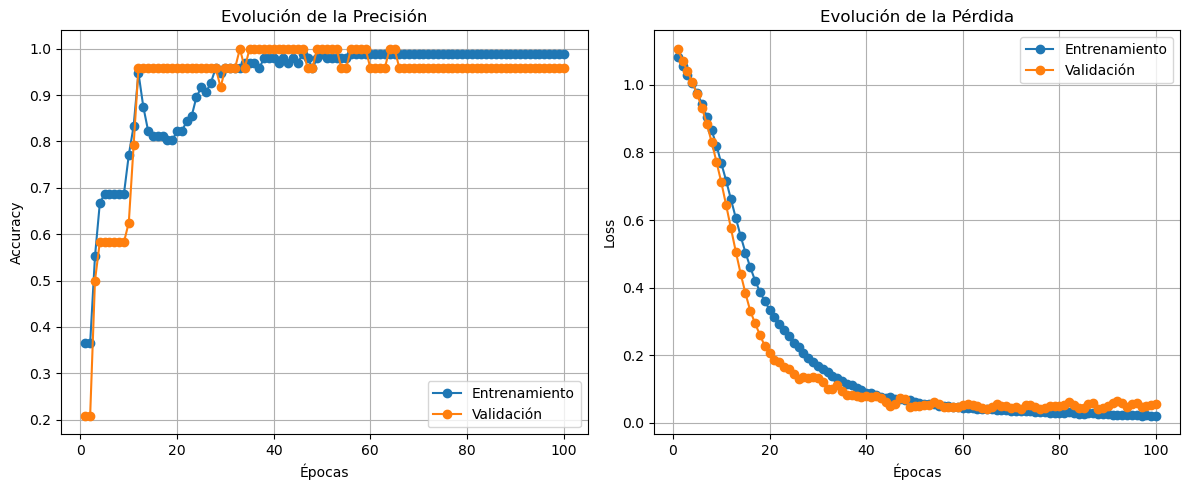

In [17]:
# Evolución del aprendizaje del modelo
# --------------------------------------

# Extraemos la información de entrenamiento y validación desde el objeto history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Definimos el número de épocas (x-axis)
epochs = range(1, len(acc) + 1)

# Gráfica de precisión
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label="Entrenamiento", marker="o")
plt.plot(epochs, val_acc, label="Validación", marker="o")
plt.title("Evolución de la Precisión")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label="Entrenamiento", marker="o")
plt.plot(epochs, val_loss, label="Validación", marker="o")
plt.title("Evolución de la Pérdida")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


En esta celda probamos el modelo con un **proveedor hipotético**.  
Se definen valores de entrada, se **escalan con el mismo `scaler`** usado en el entrenamiento y se obtiene la **predicción de categoría** mediante la red neuronal.  


In [14]:
# Definimos valores de entrada para un proveedor hipotético
ejemplo = np.array([[5.0,   # Tiempo de entrega (días)
                     3.5,   # Confiabilidad en entregas
                     2.0,   # Costos de transacción
                     1.0]]) # Defectos por millón

# Escalamos los datos con el mismo scaler usado en el entrenamiento
ejemplo_scaled = scaler.transform(ejemplo)

# Realizamos la predicción
prediccion = model.predict(ejemplo_scaled)

print(prediccion)
# Convertimos la salida numérica a etiqueta
categoria_predicha = le.inverse_transform(np.argmax(prediccion, axis=1))[0]

print("📊 Categoría de proveedor predicha:", categoria_predicha)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[9.9879682e-01 7.3865714e-08 1.2030565e-03]]
📊 Categoría de proveedor predicha: Proveedor Estratégico


In [15]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np

def predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon):
    # Construimos el array con los valores ingresados
    X_user = np.array([[tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon]])
    X_user_scaled = scaler.transform(X_user)

    # Predicción con el modelo KNN entrenado
    prediction = model.predict(X_user_scaled)
    predicted_label = le.inverse_transform(np.argmax(prediction, axis=1))
    
    print("📊 Categoría de proveedor predicha:", predicted_label[0])

# Sliders interactivos para cada variable
interact(
    predecir_proveedor,
    tiempo_entrega=widgets.FloatSlider(min=1, max=10, step=0.5, value=5, description="Entrega (días)"),
    confiabilidad=widgets.FloatSlider(min=2, max=5, step=0.1, value=3, description="Confiabilidad"),
    costos_transaccion=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=2, description="Costos"),
    defectos_millon=widgets.FloatSlider(min=0.1, max=3.5, step=0.1, value=1, description="Defectos")
)

interactive(children=(FloatSlider(value=5.0, description='Entrega (días)', max=10.0, min=1.0, step=0.5), Float…

<function __main__.predecir_proveedor(tiempo_entrega, confiabilidad, costos_transaccion, defectos_millon)>

### Evaluación

En esta celda evaluamos el desempeño del modelo sobre el **conjunto de prueba**.  
Se generan las **predicciones**, se construye la **matriz de confusión** y se calculan métricas como **accuracy** y el **reporte de clasificación** (precisión, recall y F1-score) para cada categoría de proveedor.  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


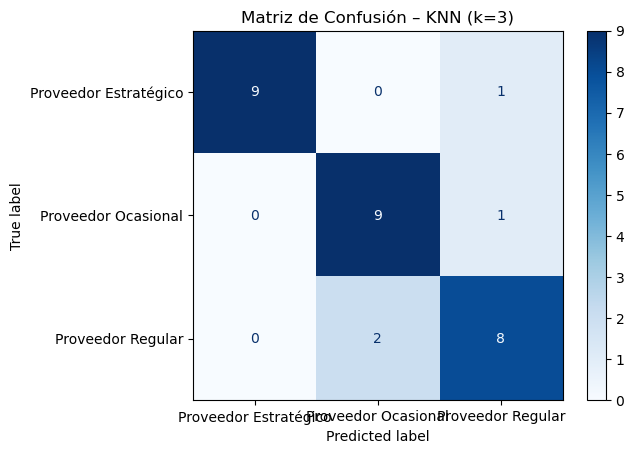

🔹 Accuracy: 0.8666666666666667

 Reporte de Clasificación:

                       precision    recall  f1-score   support

Proveedor Estratégico       1.00      0.90      0.95        10
  Proveedor Ocasional       0.82      0.90      0.86        10
    Proveedor Regular       0.80      0.80      0.80        10

             accuracy                           0.87        30
            macro avg       0.87      0.87      0.87        30
         weighted avg       0.87      0.87      0.87        30



In [16]:
#  1. Predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

#  2. Matriz de confusión
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Matriz de Confusión – KNN (k=3)")
plt.show()

#  3. Métricas de desempeño
print("🔹 Accuracy:", accuracy_score(y_test, np.argmax(y_pred, axis=1)))
print("\n Reporte de Clasificación:\n")
print(classification_report(y_test, np.argmax(y_pred, axis=1), target_names=le.classes_))